In [ ]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
#sns.set(rc={'figure.figsize':(20,10)})

In [ ]:
df = pd.read_excel("Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1_CLEANED.xlsx")

In [ ]:
df = df.drop('Unnamed: 0', axis =1)

Rename Columns

In [ ]:
df.rename(columns={'Timestamp':'time',
                     'How old are you?': 'age',
                     'What industry do you work in?':'industry',
                     'Job title': 'job',
                     'If your job title needs additional context, please clarify here:':'job_others',
                     "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'annual_salary' , 'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.' : 'addtl_compensation',
                     'Please indicate the currency': "currency",
                     'If "Other," please indicate the currency here: ': "currency_others",
                     'If your income needs additional context, please provide it here:': "income_addlcontext",
                     'What country do you work in?': "work_country",
                     "If you're in the U.S., what state do you work in?" : "US_state",
                     'What city do you work in?': "city",
                     'How many years of professional work experience do you have overall?': "yrs_exp",
                     'How many years of professional work experience do you have in your field?' : 'yrs_exp_field',
                     'What is your highest level of education completed?': "educ_level",
                     'What is your gender?': "gender",
                     'What is your race? (Choose all that apply.)' : "race"},
            inplace=True)

Change to correct data type

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['annual_salary'] = df['annual_salary'].str.replace(',', '')
df['annual_salary'] = df['annual_salary'].astype('float')
df['age'] = df['age'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28042 entries, 0 to 28041
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                28042 non-null  datetime64[ns]
 1   age                 28042 non-null  int64         
 2   industry            27968 non-null  object        
 3   job                 28041 non-null  object        
 4   job_others          7259 non-null   object        
 5   annual_salary       28042 non-null  float64       
 6   addtl_compensation  20755 non-null  float64       
 7   currency            28042 non-null  object        
 8   currency_others     202 non-null    object        
 9   income_addlcontext  3040 non-null   object        
 10  work_country        28042 non-null  object        
 11  US_state            23028 non-null  object        
 12  city                27960 non-null  object        
 13  yrs_exp             28042 non-null  int64     

Inspect null values

In [ ]:
df.isnull().sum().sort_values(ascending=False) # check number of missing values

currency_others       27840
income_addlcontext    25002
job_others            20783
addtl_compensation     7287
US_state               5014
educ_level              219
race                    175
gender                  170
city                     82
industry                 74
job                       1
currency                  0
annual_salary             0
age                       0
work_country              0
yrs_exp                   0
yrs_exp_field             0
time                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28042 entries, 0 to 28041
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                28042 non-null  datetime64[ns]
 1   age                 28042 non-null  int64         
 2   industry            27968 non-null  object        
 3   job                 28041 non-null  object        
 4   job_others          7259 non-null   object        
 5   annual_salary       28042 non-null  float64       
 6   addtl_compensation  20755 non-null  float64       
 7   currency            28042 non-null  object        
 8   currency_others     202 non-null    object        
 9   income_addlcontext  3040 non-null   object        
 10  work_country        28042 non-null  object        
 11  US_state            23028 non-null  object        
 12  city                27960 non-null  object        
 13  yrs_exp             28042 non-null  int64     

Drop duplicates

In [ ]:
#drop duplicates
df=df.drop_duplicates(subset=['age', 'industry', 'job', 'job_others', 'annual_salary',
       'addtl_compensation', 'currency', 'currency_others',
       'income_addlcontext', 'work_country', 'US_state', 'city', 'yrs_exp',
       'yrs_exp_field', 'educ_level', 'gender', 'race'])

Drop irrelevant columns, null values

In [ ]:
df.drop(columns=['time', 'currency_others', 'income_addlcontext', 'job_others'], inplace=True)

<ipython-input-58-4f7671e259c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['time', 'currency_others', 'income_addlcontext', 'job_others'], inplace=True)


In [ ]:
df1 = df.copy()

df1 = df1[~df1['educ_level'].isna()]
df1 = df1[~df1['race'].isna()]
df1 = df1[~df1['gender'].isna()]
df1 = df1[~df1['city'].isna()]
df1 = df1[~df1['industry'].isna()]
df1 = df1[~df1['job'].isna()]

In [ ]:
df1

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
1,31,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,NaN,Cambridge,10,5,College degree,Non-binary,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,NaN,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,46,Health care,Research Manager,77600.0,0.0,USD,United States,Utah,Salt Lake City,14,7,Master's degree,Woman,White
28038,41,Hospitality & Events,Director of Training,85000.0,NaN,USD,United States,Texas,Dallas,25,11,Some college,Woman,White
28039,29,Computing or Tech,Digital Content Developer,80000.0,6000.0,USD,USA,Minnesota,Minneapolis,8,7,College degree,Woman,Asian or Asian American
28040,29,Business or Consulting,business analyst,59000.0,0.0,USD,United States,Alabama,birmingham,14,1,College degree,Man,White


Fill numerical columns

In [ ]:
df1['addtl_compensation'].fillna(0, inplace=True)

Deal with outliers

In [ ]:
df1.describe()

,age,annual_salary,addtl_compensation,yrs_exp,yrs_exp_field
count,27434.000000,2.743400e+04,2.743400e+04,27434.000000,27434.000000
mean,36.156558,1.436183e+05,1.354424e+04,13.029234,9.531567
std,9.291005,5.420937e+06,7.256554e+05,8.522015,7.457387
min,14.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,29.000000,5.400000e+04,0.000000e+00,7.000000,4.000000
50%,35.000000,7.500000e+04,0.000000e+00,11.000000,7.000000
75%,42.000000,1.092615e+05,5.000000e+03,18.000000,13.000000
max,85.000000,8.700000e+08,1.200000e+08,50.000000,50.000000


In [ ]:
def remove_outlier_data(df1, column):

  Q1c=df1[column].quantile(0.25)
  Q3c=df1[column].quantile(0.75)

  print('1stQ: ',Q1c, ' 2nsQ: ',Q3c)

  IQRc = Q3c-Q1c
  l = Q1c-1.5*IQRc
  h = Q3c+1.5*IQRc

  print(df1.shape, l, h)
  data1 = df1[(df1[column] >l)&(df1[column] < h)]

  return data1

In [ ]:
df2 = remove_outlier_data(df1, 'annual_salary')
df2 = remove_outlier_data(df2, 'addtl_compensation')
df2 = remove_outlier_data(df2, 'yrs_exp')
df2 = remove_outlier_data(df2, 'yrs_exp_field')
df2 = remove_outlier_data(df2, 'age')

1stQ:  54000.0  2nsQ:  109261.5
(27434, 14) -28892.25 192153.75
1stQ:  0.0  2nsQ:  5000.0
(26270, 14) -7500.0 12500.0
1stQ:  6.0  2nsQ:  18.0
(22964, 14) -12.0 36.0
1stQ:  4.0  2nsQ:  12.0
(22525, 14) -8.0 24.0
1stQ:  29.0  2nsQ:  40.0
(21556, 14) 12.5 56.5


In [ ]:
df2

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
1,31,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,NaN,Cambridge,10,5,College degree,Non-binary,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,46,Health care,Research Manager,77600.0,0.0,USD,United States,Utah,Salt Lake City,14,7,Master's degree,Woman,White
28038,41,Hospitality & Events,Director of Training,85000.0,0.0,USD,United States,Texas,Dallas,25,11,Some college,Woman,White
28039,29,Computing or Tech,Digital Content Developer,80000.0,6000.0,USD,USA,Minnesota,Minneapolis,8,7,College degree,Woman,Asian or Asian American
28040,29,Business or Consulting,business analyst,59000.0,0.0,USD,United States,Alabama,birmingham,14,1,College degree,Man,White


Check number of unique entries per column

In [ ]:
for cat in df2.columns:

  print(cat, df2[cat].nunique())

age 42
industry 1007
job 11447
annual_salary 2905
addtl_compensation 398
currency 9
work_country 312
US_state 112
city 4073
yrs_exp 36
yrs_exp_field 24
educ_level 6
gender 5
race 46


Find inconsistent USA names

In [ ]:
df3 = df2.copy()
df3

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
1,31,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,NaN,Cambridge,10,5,College degree,Non-binary,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,46,Health care,Research Manager,77600.0,0.0,USD,United States,Utah,Salt Lake City,14,7,Master's degree,Woman,White
28038,41,Hospitality & Events,Director of Training,85000.0,0.0,USD,United States,Texas,Dallas,25,11,Some college,Woman,White
28039,29,Computing or Tech,Digital Content Developer,80000.0,6000.0,USD,USA,Minnesota,Minneapolis,8,7,College degree,Woman,Asian or Asian American
28040,29,Business or Consulting,business analyst,59000.0,0.0,USD,United States,Alabama,birmingham,14,1,College degree,Man,White


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21285 entries, 0 to 28041
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 21285 non-null  int64  
 1   industry            21285 non-null  object 
 2   job                 21285 non-null  object 
 3   annual_salary       21285 non-null  float64
 4   addtl_compensation  21285 non-null  float64
 5   currency            21285 non-null  object 
 6   work_country        21285 non-null  object 
 7   US_state            17343 non-null  object 
 8   city                21285 non-null  object 
 9   yrs_exp             21285 non-null  int64  
 10  yrs_exp_field       21285 non-null  int64  
 11  educ_level          21285 non-null  object 
 12  gender              21285 non-null  object 
 13  race                21285 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 2.4+ MB


Select only top 80% of occurences on the race, industry, and work country column

In [ ]:
df_us = df3[df3['currency'] == 'USD']
df_state = df_us.copy()
df_state = df3[~df3['US_state'].isna()]
df_state

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
5,28,Education (Higher Education),Scholarly Publishing Librarian,62000.0,0.0,USD,USA,New Hampshire,Hanover,8,2,Master's degree,Man,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,46,Health care,Research Manager,77600.0,0.0,USD,United States,Utah,Salt Lake City,14,7,Master's degree,Woman,White
28038,41,Hospitality & Events,Director of Training,85000.0,0.0,USD,United States,Texas,Dallas,25,11,Some college,Woman,White
28039,29,Computing or Tech,Digital Content Developer,80000.0,6000.0,USD,USA,Minnesota,Minneapolis,8,7,College degree,Woman,Asian or Asian American
28040,29,Business or Consulting,business analyst,59000.0,0.0,USD,United States,Alabama,birmingham,14,1,College degree,Man,White


In [ ]:
for cat in df_us.columns:

  print(cat, df_us[cat].nunique())

age 42
industry 862
job 9583
annual_salary 2404
addtl_compensation 350
currency 1
work_country 186
US_state 112
city 3309
yrs_exp 36
yrs_exp_field 24
educ_level 6
gender 5
race 42


In [ ]:
df4 = df_state.copy()
df4.head()

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
5,28,Education (Higher Education),Scholarly Publishing Librarian,62000.0,0.0,USD,USA,New Hampshire,Hanover,8,2,Master's degree,Man,White


In [ ]:
int(len(df4)*0.8)

13874

Geto top 80 for race, industry

In [ ]:
#top_80_race = df4["race"].value_counts().head(5)
#s = df4["industry"].value_counts().cumsum() < int(len(df4) * 0.8)
#top_80_industry = s[s].index
#s1 = df4["US_state"].value_counts().cumsum()<int(len(df4) * 0.8)
#top_80_state = s1[s1].index
#s2 = df4["job"].value_counts().cumsum()<int(len(df4) * 0.8)
#top_80_job = s2[s2].index

NOTE: we can also try feature engineering: other currencies to USD; top 10?% jobs only;

In [ ]:
ind = df4['industry'].value_counts().cumsum() <int(len(df4) * 0.8)
top_80_ind = ind[ind].index

top_80_race = df4['race'].value_counts().head(5).index

state = df4['US_state'].value_counts().cumsum() <int(len(df4) * 0.8)
top_80_state = state[state].index

country = df4['work_country'].value_counts().cumsum() <int(len(df4) * 0.8)
top_80_country = country[country].index

df5 = df4[df4['industry'].isin(top_80_ind) & df4['race'].isin(top_80_race) & df4['US_state'].isin(top_80_state) & df4['work_country'].isin(top_80_country)]
df5

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
11,44,Education (Higher Education),Deputy Title IX Coordinator/ Assistant Directo...,62000.0,0.0,USD,USA,Pennsylvania,Scranton,15,7,PhD,Woman,"Hispanic, Latino, or Spanish origin, White"
16,37,Business or Consulting,Executive Assistant,85000.0,5000.0,USD,USA,Illinois,Chicago,9,10,Some college,Woman,White
18,38,Business or Consulting,Senior Manager,98000.0,1000.0,USD,USA,Georgia,Atlanta,14,4,Master's degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28001,41,Health care,Senior Director of Data and Analytics,172000.0,10320.0,USD,United States,Illinois,Chicago,26,17,Master's degree,Man,White
28016,22,Nonprofits,Research Assistant,50000.0,0.0,USD,United States,District of Columbia,Washington,1,1,College degree,Other or prefer not to answer,White
28027,51,Computing or Tech,Senior Data Analyst,115000.0,5000.0,USD,USA,North Carolina,Raleigh,7,6,Master's degree,Woman,White
28039,29,Computing or Tech,Digital Content Developer,80000.0,6000.0,USD,USA,Minnesota,Minneapolis,8,7,College degree,Woman,Asian or Asian American


In [ ]:
#int(len(df4['industry'].unique()) * 0.8)

Input these values into df3 to reduce number of dummies

In [ ]:
#df4["race"] = df4["race"].apply(lambda x: x if x in top_80_race else "Others")

#df4 = df4[df4["industry"].isin(top_80_industry)]

#df4 = df4[df4["US_state"].isin(top_80_state)]

#df4 = df4[df4["job"].isin(top_80_job)]

#df4["gender"].replace("Others", "Unknown", inplace=True)

In [ ]:
df6 = df5.copy()
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7642 entries, 0 to 28041
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 7642 non-null   int64  
 1   industry            7642 non-null   object 
 2   job                 7642 non-null   object 
 3   annual_salary       7642 non-null   float64
 4   addtl_compensation  7642 non-null   float64
 5   currency            7642 non-null   object 
 6   work_country        7642 non-null   object 
 7   US_state            7642 non-null   object 
 8   city                7642 non-null   object 
 9   yrs_exp             7642 non-null   int64  
 10  yrs_exp_field       7642 non-null   int64  
 11  educ_level          7642 non-null   object 
 12  gender              7642 non-null   object 
 13  race                7642 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 895.5+ KB


In [ ]:
for cat in df6.columns:

  print(cat, df6[cat].nunique())

age 40
industry 13
job 4521
annual_salary 1269
addtl_compensation 195
currency 3
work_country 2
US_state 19
city 1364
yrs_exp 36
yrs_exp_field 24
educ_level 6
gender 4
race 5


Drop irrelelvant column: Job, city

In [ ]:
df6 = df6.drop(['job','city', 'currency'],axis=1)
for cat in df6.columns:

  print(cat, df6[cat].nunique())

age 40
industry 13
annual_salary 1269
addtl_compensation 195
work_country 2
US_state 19
yrs_exp 36
yrs_exp_field 24
educ_level 6
gender 4
race 5


Split data to training and test sets

In [ ]:
df7 = df6.copy()

In [ ]:
# split dataset into training and test datasets

from sklearn.model_selection import train_test_split

X = df7.drop('annual_salary', axis=1)  # Features
y = df7['annual_salary']  # Target variable

Get dummies!

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)

print("Number of training samples:", X_train.shape)
print("Number of testing samples:", X_test.shape)


Number of training samples: (6113, 53)
Number of testing samples: (1529, 53)


Get dummies!

In [ ]:
#X_train = pd.get_dummies(X_train)
#X_test = pd.get_dummies(X_test)
#print('train:', X_train.shape,
#      'test: ', X_test.shape)

Train and Evaluate the regression tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 1234)

In [ ]:
model = regressor.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train)

0.9999952683712685

In [ ]:
model.score(X_test, y_test)

-0.16424765277779696

Scaled

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = MinMaxScaler((0,1))
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get the names of the features
feature_names = X_train.columns

# Print the feature names
print("Feature names:", feature_names)

Feature names: Index(['age', 'addtl_compensation', 'yrs_exp', 'yrs_exp_field',
       'industry_Accounting, Banking & Finance',
       'industry_Business or Consulting', 'industry_Computing or Tech',
       'industry_Education (Higher Education)',
       'industry_Education (Primary/Secondary)',
       'industry_Engineering or Manufacturing',
       'industry_Government and Public Administration', 'industry_Health care',
       'industry_Law', 'industry_Marketing, Advertising & PR',
       'industry_Media & Digital', 'industry_Nonprofits',
       'industry_Recruitment or HR', 'work_country_USA',
       'work_country_United States', 'US_state_California',
       'US_state_Colorado', 'US_state_District of Columbia',
       'US_state_Florida', 'US_state_Georgia', 'US_state_Illinois',
       'US_state_Maryland', 'US_state_Massachusetts', 'US_state_Michigan',
       'US_state_Minnesota', 'US_state_New York', 'US_state_North Carolina',
       'US_state_Ohio', 'US_state_Oregon', 'US_state_Pen

In [ ]:
# train models using decision tree and random forest regressor and do hyperparameter tuning via gridsearch

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the decision tree model
dt_model = DecisionTreeRegressor()

# Define the grid of hyperparameters for decision tree (Feel free to change)
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.1, 0.2]

}

In [ ]:
# Perform grid search for decision tree
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5)
# dt_grid_search.fit(X_train, y_train)
dt_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters for decision tree
print("Best parameters for decision tree:", dt_grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Best parameters for decision tree: {'ccp_alpha': 0.1, 'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6480 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _

Best parameters for decision tree: {'ccp_alpha': 0.2, 'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}

In [ ]:
# Define the random forest model
rf_model = RandomForestRegressor()

# Define the grid of hyperparameters for random forest (Feel free to change)
rf_param_grid = {
    'n_estimators': [100, 250],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for random forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
# rf_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters for random forest
print("Best parameters for random forest:", rf_grid_search.best_params_)

Best parameters for random forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250}


Decision tree RMSE: 28216.54075213427
Decision tree R2: 0.31262988440655104
Random forest RMSE: 26699.801529536133
Random forest R2: 0.38454093407738066


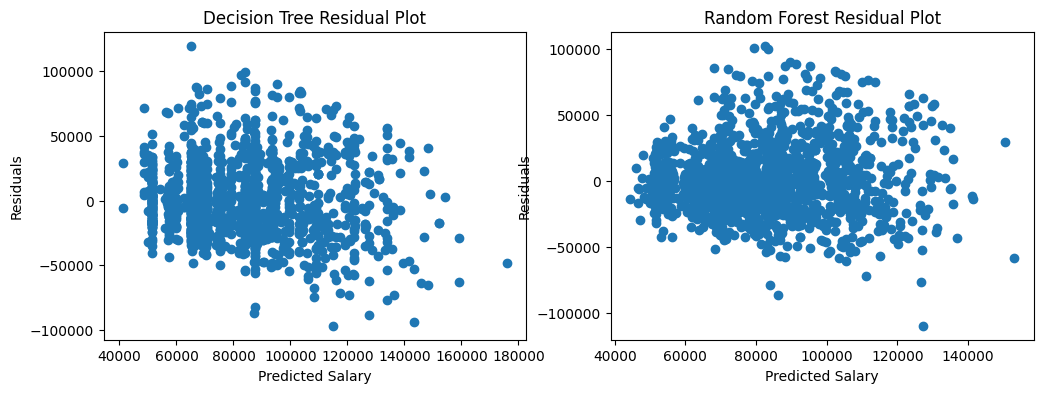

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the decision tree model on the test set
# dt_pred = dt_grid_search.predict(X_test)
dt_pred = dt_grid_search.predict(X_test_scaled)
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)
dt_r2 = r2_score(y_test, dt_pred)

# Evaluate the random forest model on the test set
# rf_pred = rf_grid_search.best_estimator_.predict(X_test)
rf_pred = rf_grid_search.best_estimator_.predict(X_test_scaled)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

# Print the evaluation metrics for both models
print("Decision tree RMSE:", dt_rmse)
print("Decision tree R2:", dt_r2)
print("Random forest RMSE:", rf_rmse)
print("Random forest R2:", rf_r2)

# Plot the residuals for both models
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(dt_pred, y_test - dt_pred)
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Decision Tree Residual Plot")

plt.subplot(1, 2, 2)
plt.scatter(rf_pred, y_test - rf_pred)
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Random Forest Residual Plot")

plt.show()

Model scores

In [ ]:
dt_grid_search.score(X_test_scaled, y_test)

0.31262988440655104

In [ ]:
rf_grid_search.best_estimator_.score(X_test_scaled, y_test)

0.38454093407738066

##Prediction

In [ ]:
# Create a new data point with the given characteristics
new_hire = {
'age': 34,
 'industry': 'Computing or Tech',
 'US_state': 'Massachusetts',
 'yrs_exp': 5,
 'yrs_exp_field': 4,
 'educ_level': "High School",
 'gender': 'Woman',
 'race': 'Asian or Asian American'
}

# Convert new_hire to a DataFrame
new_hire_df = pd.get_dummies(pd.DataFrame([new_hire]))

new_hire_df_1 = pd.DataFrame(data=new_hire_df, columns = X.columns)
new_hire_df_1.fillna(0, inplace=True)

# Scale new_hire
new_hire_df_1_scaled = scaler.transform(new_hire_df_1)

# Predict the salary using the decision tree model
predicted_salary_dt = dt_grid_search.best_estimator_.predict(new_hire_df_1_scaled)[0]
predicted_salary_rf = rf_grid_search.best_estimator_.predict(new_hire_df_1_scaled)[0]

# Print the predicted salary
print("Predicted salary DT:", predicted_salary_dt)
print("Predicted salary RF:", predicted_salary_rf)

Predicted salary DT: 87176.47706422018
Predicted salary RF: 100551.26282196402


## **Top Predictors of Salary**

In [ ]:
df

In [ ]:
from sklearn.ensemble import RandomForestClassifier

importances = model.feature_importances_

# Sort features by importance (descending order)
feature_names = X_train.columns  # Assuming feature names are in the columns
sorted_idx = np.argsort(importances)[::-1]

# Get top 3 features
top_3_features = feature_names[sorted_idx[:3]]

print("Top 3 predictors:", top_3_features)

Top 3 predictors: Index(['yrs_exp_field', 'age', 'yrs_exp'], dtype='object')


Top 10 predictors

In [ ]:
# Get top 10 features
top_10_features = feature_names[sorted_idx[:10]]
top_10_importances = importances[sorted_idx[:10]]

# Print the top 10 most important features
print("Top 10 Predictors:")
for i, feature in enumerate(top_10_features):
    print(f"{i+1}. {feature} (Importance: {top_10_importances[i]:.4f})")

Top 10 Predictors:
1. yrs_exp_field (Importance: 0.1725)
2. age (Importance: 0.1062)
3. yrs_exp (Importance: 0.1001)
4. industry_Computing or Tech (Importance: 0.0997)
5. addtl_compensation (Importance: 0.0790)
6. US_state_California (Importance: 0.0236)
7. industry_Education (Higher Education) (Importance: 0.0201)
8. educ_level_College degree (Importance: 0.0182)
9. educ_level_PhD (Importance: 0.0182)
10. educ_level_Professional degree (MD, JD, etc.) (Importance: 0.0171)


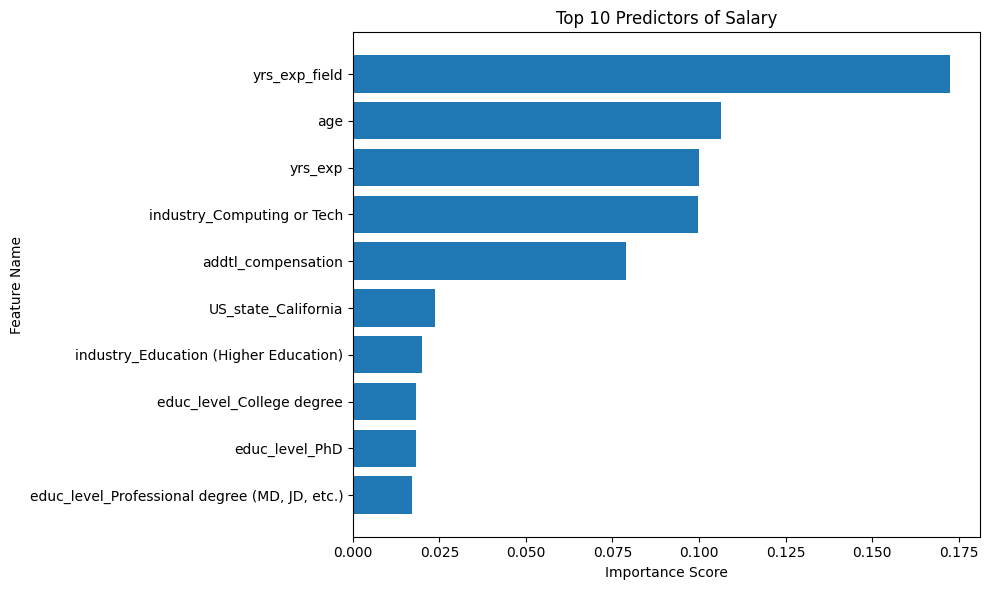

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importances)
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 10 Predictors of Salary")
plt.gca().invert_yaxis()  # Invert y-axis to display top features at the top
plt.tight_layout()
plt.show()